# IRISpy SJICube

In [107]:
from irispy.sji import SJICube
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation
from astropy.coordinates.sky_coordinate import SkyCoord as SC
import astropy.units as u

%matplotlib inline
plt.rcParams.update({'figure.dpi': 100})

### IRISpy Sample Data

In [108]:
from irispy.data import sample
#To download sample data:
#irispy.data.sample.download_sample_data()
sji1330cube=SJICube(sample.SJI_CUBE_1330)
sji1400cube=SJICube(sample.SJI_CUBE_1400)
sji2796cube=SJICube(sample.SJI_CUBE_2796)
sji2832cube=SJICube(sample.SJI_CUBE_2832)

In [109]:
i=8
sji1330map = sji1330[i]
sji1400map = sji1400[i]
sji2796map = sji2796[i]
sji2832map = sji2832[i]

### SJI Map Plotting

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,


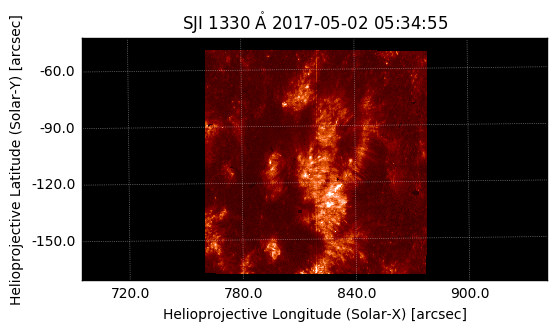

In [110]:
sji1330norm = colors.Normalize(-32010, -31700)
sji1330map.plot_settings['norm']=sji1330norm
sji1330map.plot()

### SJI MapCube Stats

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,


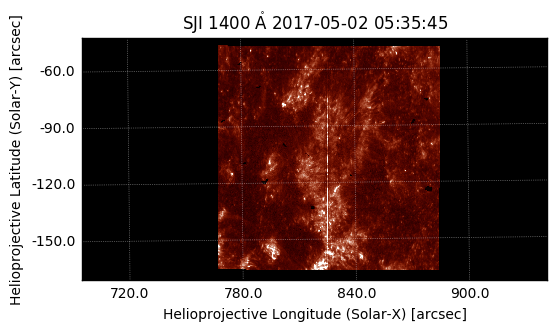

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,


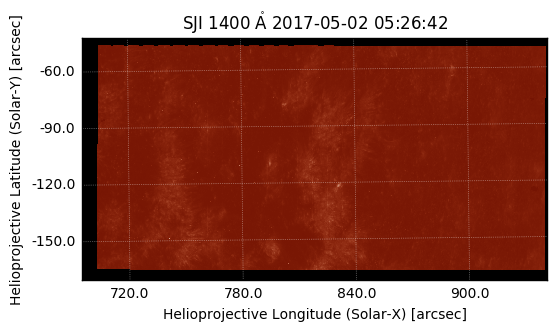

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,


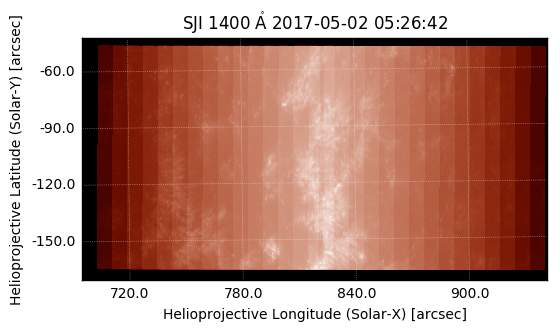

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,


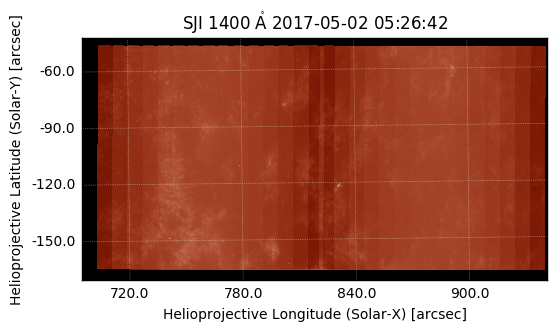

In [119]:
sji1400norm = colors.Normalize(-31970, -31500)
sji1400map.plot_settings['norm']=sji1400norm
sji1400cube.mean().plot_settings['norm']=sji1400norm
sji1400cube.max().plot_settings['norm']=sji1400norm
sji1400cube.std().plot_settings['norm']=sji1400norm

# Plot max, mean, and std values from all Maps
sji1400map.plot()
plt.show()

sji1400cube.max().plot()
plt.show()

sji1400cube.mean().plot()
plt.show()

sji1400cube.std().plot()
plt.show()

### Animate SJI MapCube

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/s

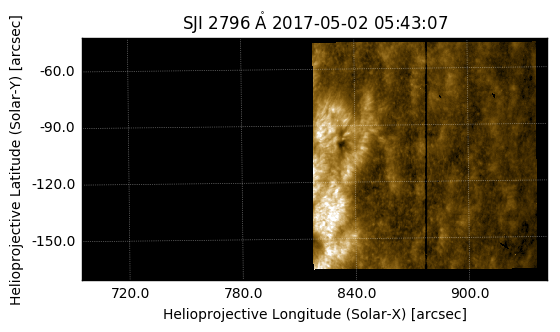

In [120]:
from IPython.display import HTML
maplist=[]
sji2796norm = colors.Normalize(-31710, -30200)
fig0=plt.figure(dpi=100)
#In progress, normally sunpy mapcubes will animate with simply .plot() or .peek(),
#My best workaround -> list of <matplotlib.image.AxesImage> types run through
#matplotlib animator:
for n in sji2796cube:
    n.plot_settings['norm']=sji2796norm
    maplist.append([n.plot()])
anim = animation.ArtistAnimation(fig0, maplist, interval=20, blit=True)

#Saving animation requires mpeg writer, i.e. ffmpeg, HTML5 is great for ipython notebooks
#ex: anim.save(fig, output file, writer=writer)
HTML(anim.to_html5_video())

# GUI Overlays

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/s

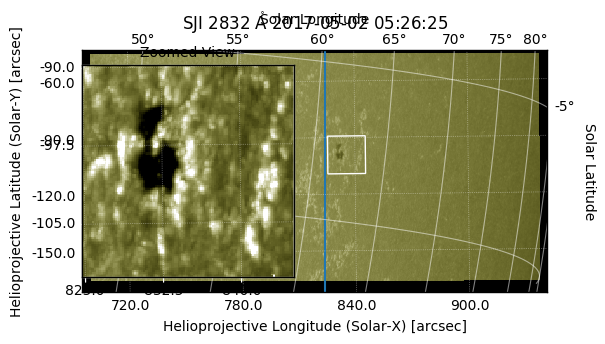

In [142]:
fig1=plt.figure(dpi=100)
sji2832norm = colors.Normalize(-30900, -29100)
sji2832.max().plot_settings['norm']=sji2832norm

# Add overlay slit
sji2832map.draw_slit()
# Add a overlay grid.
sji2832map.draw_grid(grid_spacing=5*u.deg)
# Define a region of interest
length = 20 * u.arcsec
x = 825 * u.arcsec
y = -110 * u.arcsec
bl = SC(x, y, frame= 'helioprojective')
tr = SC(x+length, y+length, frame= 'helioprojective')
submap = sji2832.max().submap(bl,tr)
submap.plot_settings['norm']=sji2832norm


#ax = fig3.add_subplot(2,1,1, projection=sji2832.max())
sji2832map.draw_rectangle(SC(x+7*u.arcsec, y-13*u.arcsec, frame= 'helioprojective'),length,-length)
sji2832.max().plot()

ax1 = fig1.add_subplot(1,2,1, projection=submap)
submap.plot(ax1)
ax1.set_title('Zoomed View',  fontsize=10)
ax1.set_xticklabels('',visible=False)
ax1.set_yticklabels('',visible=False)
ax1.set_xlabel('',visible=False)
ax1.set_ylabel('',visible=False)



In [114]:
x0 = 775 * u.arcsec
y0 = -155 * u.arcsec
xlength = 25 * u.arcsec
ylength = 100 * u.arcsec
bl = [SC(x0, y0, frame= 'helioprojective'),
      SC(x0 + xlength, y0, frame= 'helioprojective'),
      SC(x0 + 2*xlength, y0, frame= 'helioprojective'),
      SC(x0 + 3*xlength, y0, frame= 'helioprojective')]
tr = [SC(x0 + xlength, y0 + ylength, frame= 'helioprojective'),
      SC(x0 + 2*xlength, y0 + ylength, frame= 'helioprojective'),
      SC(x0 + 3*xlength, y0 + ylength, frame= 'helioprojective'),
      SC(x0 + 4*xlength, y0 + ylength, frame= 'helioprojective')]

submap0=sji2832map.submap(bl[0],tr[0])
submap1=sji2796map.submap(bl[1],tr[1])
submap2=sji1330map.submap(bl[2],tr[2])
submap3=sji1400map.submap(bl[3],tr[3])


/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/s

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:1689: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:623: Warning: Missing metadata

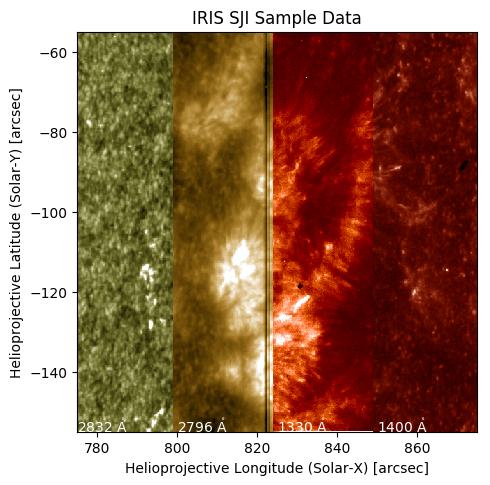

In [115]:
fig2=plt.figure(dpi=100)
ax2=fig2.add_axes([0,0,1,1])
ax2.set_xlim(775,875)
submap0.plot_settings['norm']=sji2832norm
submap0.plot(ax2)
submap1.plot_settings['norm']=sji2796norm
submap1.plot(ax2)
submap2.plot_settings['norm']=sji1330norm
submap2.plot(ax2)
submap3.plot_settings['norm']=sji1400norm
submap3.plot(ax2)
#submap1.draw_slit()

ax2.set_title('IRIS SJI Sample Data')
#Annotations
ax2.annotate(submap0.wavelength._repr_latex_(),xy=(bl[0].data._lon.arcsec,bl[0].data._lat.arcsec),color='white')
ax2.annotate(submap1.wavelength._repr_latex_(),xy=(bl[1].data._lon.arcsec,bl[1].data._lat.arcsec),color='white')
ax2.annotate(submap2.wavelength._repr_latex_(),xy=(bl[2].data._lon.arcsec,bl[2].data._lat.arcsec),color='white')
ax2.annotate(submap3.wavelength._repr_latex_(),xy=(bl[3].data._lon.arcsec,bl[3].data._lat.arcsec),color='white')


In [116]:
# Get wavelength measurement
sji2832.measurement#._repr_latex_()


<Quantity 2832.0 Angstrom>

In [117]:
# Change wavelength units
sji2832.measurement.to('keV', equivalencies=u.spectral())

<Quantity 0.004377973071907032 keV>

In [144]:
sji2832.meta

<bound method SJICube.meta of SunPy SJICube
---------
Observatory:	 IRIS
Instrument:	 SJI
Detector:	 SJI
Measurement:	 2832.0 Angstrom
Wavelength:	 2832.0 Angstrom
Obs. Start:	 2017-05-02 05:26:25
Obs. End:	 2017-05-02 05:43:24
Num. of Frames:	 16
IRIS Obs. id:	 3893010094
IRIS Obs. Description:	 Large coarse 64-step raster 126x120 64s   Deep x 15   SJI cadence 3x
Dimensions:	 [ 1482.   772.]
Scale:		 [ 0.16635  0.16635] arcsec / pix
array([[[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ..., 
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768]],

       [[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -327